# Traffic Accidents in India, Exploratory Data Analysis

This report is an analysis of Traffic accidents that happened in India from 2001 to 2014 and how the numbers compare to the world.

## Downloading the datasets

In [69]:
!pip install opendatasets --upgrade --quiet

In [70]:
url='https://www.kaggle.com/datasets/iamahumannow/traffic-accidents-in-india'

In [71]:
import opendatasets as od

In [72]:
od.download(url)

Skipping, found downloaded files in "./traffic-accidents-in-india" (use force=True to force download)


List of files in our directory:

In [73]:
dir='./traffic-accidents-in-india'

In [74]:
import os
os.listdir(dir)

['final1.csv', 'final2.csv', 'weather.csv', 'world.csv']

Importing pandas library to read the csv files from the directory

In [75]:
import pandas as pd

In [76]:
time_df=pd.read_csv('./traffic-accidents-in-india/final1.csv')
month_df=pd.read_csv('./traffic-accidents-in-india/final2.csv')
weather_df=pd.read_csv('./traffic-accidents-in-india/weather.csv')
world_df=pd.read_csv('./traffic-accidents-in-india/world.csv')

## Data Cleaning

Before we continue with the analysis, first step is to clean the chosen datasets. This is essentially dealing with inconsistent data, removing outliers, etc.

In [77]:
time_df.drop(time_df.columns[0],axis=1,inplace=True)

In [78]:
time_df

,place,year,0to3hrs,3to6hrs,6to9hrs,9to12hrs,12to15hrs,15to18hrs,18to21hrs,21to24hrs,total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206
...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1241,1397,1721,2508,2272,2296,1831,1459,14725
486,West Bengal,2011,1200,1493,1687,2553,2182,2196,1812,1345,14468
487,West Bengal,2012,1346,1511,1837,2831,2328,2268,1966,1521,15608
488,West Bengal,2013,1442,1911,2136,2900,2246,2366,2137,1411,16549


In [79]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   place      490 non-null    object
 1   year       490 non-null    int64 
 2   0to3hrs    490 non-null    int64 
 3   3to6hrs    490 non-null    int64 
 4   6to9hrs    490 non-null    int64 
 5   9to12hrs   490 non-null    int64 
 6   12to15hrs  490 non-null    int64 
 7   15to18hrs  490 non-null    int64 
 8   18to21hrs  490 non-null    int64 
 9   21to24hrs  490 non-null    int64 
 10  total      490 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 42.2+ KB


In [80]:
time_df.shape

(490, 11)

In [81]:
time_df.describe()

,year,0to3hrs,3to6hrs,6to9hrs,9to12hrs,12to15hrs,15to18hrs,18to21hrs,21to24hrs,total
count,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2007.500000,796.320408,969.236735,1371.15102,1753.967347,1681.814286,1850.283673,1782.918367,1228.810204,11434.502041
std,4.035249,1210.999326,1415.984501,1864.19157,2400.593532,2326.251665,2643.765262,2587.452453,1836.242850,15948.689470
min,2001.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,10.000000,15.000000,36.00000,51.250000,59.250000,59.000000,50.000000,25.250000,357.750000
50%,2007.500000,200.000000,251.500000,498.50000,678.000000,679.500000,669.000000,517.000000,343.500000,4174.500000
75%,2011.000000,1114.250000,1355.250000,2073.75000,2680.500000,2265.500000,2289.000000,2072.000000,1594.750000,16463.500000
max,2014.000000,6020.000000,6545.000000,8241.00000,14568.000000,11089.000000,13789.000000,13927.000000,10364.000000,75480.000000


Here we can find basic information about the dataframe

Similarly for the remaining datasets

In [82]:
month_df.drop(month_df.columns[0],axis=1,inplace=True)

In [83]:
month_df

,state/ut,year,january,february,march,april,may,june,july,august,september,october,november,december,total
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1245,1150,1349,1246,1172,1284,1231,1190,1128,1227,1251,1252,14725
486,West Bengal,2011,1350,1179,1314,1148,1220,1241,1185,1074,1112,1214,1161,1270,14468
487,West Bengal,2012,1346,1383,1357,1270,1352,1434,1349,1204,1112,1251,1179,1371,15608
488,West Bengal,2013,1564,1382,1474,1392,1629,1391,1315,1208,1228,1299,1335,1332,16549


In [84]:
weather_df.columns=map(str.lower,weather_df.columns)
weather_df

,state/ ut,clear_total,clear_death,clear_injured,fog_total,fog_death,fog_injured,cloudy_total,cloudy_death,cloudy_injured,...,light_rain_injured,heavy_rain_total,heavy_rain_death,heavy_rain_injured,flooding_total,flooding_death,flooding_injured,dust_storm_total,dust_storm_death,dust_storm_injured
0,Andhra Pradesh,14591.0,4586,17065.0,724.0,219,925.0,647.0,188.0,916.0,...,1440.0,695.0,231,856.0,139.0,78.0,158.0,170.0,41.0,210.0
1,Arunachal Pradesh,71.0,30,110.0,14.0,10,26.0,11.0,8.0,24.0,...,32.0,10.0,8,30.0,0.0,0.0,0.0,12.0,9.0,15.0
2,Assam,3575.0,1318,3216.0,494.0,150,368.0,285.0,100.0,290.0,...,277.0,189.0,64,197.0,17.0,5.0,14.0,17.0,12.0,7.0
3,Bihar,2343.0,1218,1626.0,1713.0,881,1081.0,438.0,203.0,316.0,...,481.0,609.0,328,423.0,228.0,122.0,140.0,352.0,146.0,273.0
4,Chhattisgarh,5000.0,1354,4584.0,382.0,149,376.0,863.0,216.0,789.0,...,1670.0,718.0,194,725.0,107.0,41.0,127.0,198.0,72.0,207.0
5,Goa,3556.0,257,1585.0,0.0,0,0.0,27.0,6.0,17.0,...,195.0,222.0,8,80.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Gujarat,15008.0,4876,14431.0,643.0,176,639.0,1066.0,387.0,915.0,...,1273.0,815.0,276,834.0,116.0,30.0,141.0,441.0,158.0,365.0
7,Haryana,5519.0,2043,5261.0,724.0,263,716.0,310.0,160.0,194.0,...,442.0,300.0,143,162.0,242.0,136.0,122.0,264.0,176.0,130.0
8,Himachal Pradesh,2070.0,736,3635.0,90.0,45,232.0,195.0,96.0,482.0,...,221.0,86.0,27,138.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Jammu & Kashmir,5290.0,816,7297.0,16.0,7,19.0,79.0,26.0,51.0,...,45.0,90.0,32,58.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
weather_df.shape

(37, 22)

In [86]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state/ ut           37 non-null     object 
 1   clear_total         36 non-null     float64
 2   clear_death         37 non-null     int64  
 3   clear_injured       36 non-null     float64
 4   fog_total           36 non-null     float64
 5   fog_death           37 non-null     int64  
 6   fog_injured         36 non-null     float64
 7   cloudy_total        36 non-null     float64
 8   cloudy_death        36 non-null     float64
 9   cloudy_injured      36 non-null     float64
 10  light_rain_total    36 non-null     float64
 11  light_rain_death    36 non-null     float64
 12  light_rain_injured  36 non-null     float64
 13  heavy_rain_total    36 non-null     float64
 14  heavy_rain_death    37 non-null     int64  
 15  heavy_rain_injured  36 non-null     float64
 16  flooding_t

In [87]:
world_df

,Index,Country,Code,Year,Deaths,Sidedness
0,0,Afghanistan,AFG,1990,4154,0
1,1,Afghanistan,AFG,1991,4472,0
2,2,Afghanistan,AFG,1992,5106,0
3,3,Afghanistan,AFG,1993,5681,0
4,4,Afghanistan,AFG,1994,6001,0
...,...,...,...,...,...,...
8005,8005,Zimbabwe,ZWE,2015,2373,1
8006,8006,Zimbabwe,ZWE,2016,2436,1
8007,8007,Zimbabwe,ZWE,2017,2473,1
8008,8008,Zimbabwe,ZWE,2018,2509,1


In [88]:
world_df.drop(['Index','Sidedness'],axis=1,inplace=True)

In [90]:
world_df

,Country,Code,Year,Deaths
0,Afghanistan,AFG,1990,4154
1,Afghanistan,AFG,1991,4472
2,Afghanistan,AFG,1992,5106
3,Afghanistan,AFG,1993,5681
4,Afghanistan,AFG,1994,6001
...,...,...,...,...
8005,Zimbabwe,ZWE,2015,2373
8006,Zimbabwe,ZWE,2016,2436
8007,Zimbabwe,ZWE,2017,2473
8008,Zimbabwe,ZWE,2018,2509


In [91]:
world_df.shape

(8010, 4)

## Analysis and Visualization

Lets begin the analysis by importing matplotlib and seaborn

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Configuring the graph design for all the upcoming plots,

In [94]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Total number of accidents 

Using the lineplot function in seaborn to draw line graph

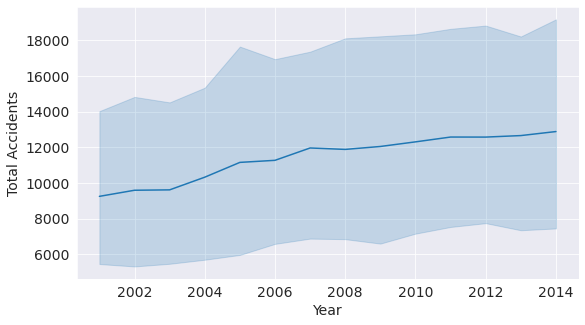

In [95]:
sns.lineplot(data=month_df,x='year',y='total');
plt.xlabel('Year')
plt.ylabel('Total Accidents');

As we can see the trend is steadily increasing as time goes by, this is due to the increasing population and development of the country which allows more people to get access to their own vehicles.

Comparing accidents across year and month

In [165]:
total_per_month=month_df.groupby('year')['january','february','march','april','may','june','july','august','september','october','november','december'].sum()
total_per_month=total_per_month.astype('int')

/tmp/ipykernel_45/1405104340.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_per_month=month_df.groupby('year')['january','february','march','april','may','june','july','august','september','october','november','december'].sum()


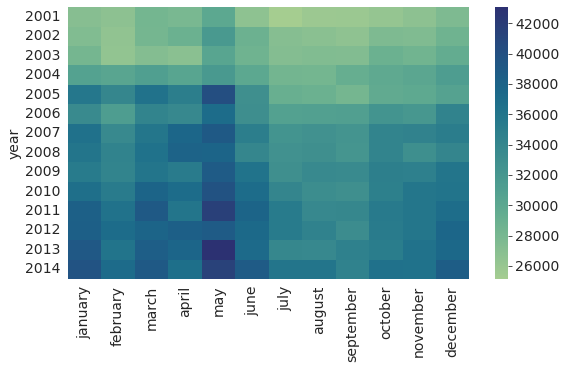

In [166]:
sns.heatmap(total_per_month,fmt='f',cmap='crest');

## Answering Questions

In this section, let us try to ask and answer some questions

Q1: Which weather causes the most deaths?

In [98]:
sum1_df=weather_df.sum()

In [99]:
labels=[col for col in weather_df.columns if 'death' in col]
data1=sum1_df[labels]

In [100]:
data1

clear_death          167454
fog_death             11772
cloudy_death         9374.0
light_rain_death    15156.0
heavy_rain_death      11628
flooding_death       1742.0
dust_storm_death     3516.0
dtype: object

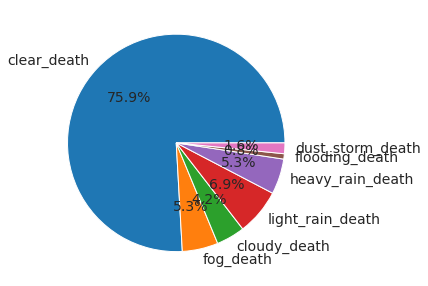

In [101]:
plt.pie(data1,labels=labels,autopct='%0.1f%%');

As we can infer from the above pie chart, we can see that light rain has the most number of deaths after clear weather.
Since weather is not the only deciding factor for an accident, clear weather need not necessarily have  low number of deaths

Q2: Find the accidents in goa on different months and number of deaths in clear weather

In [114]:
goa_df=month_df.groupby('state/ut').sum().reset_index()

In [115]:
goa_df=goa_df.loc[goa_df['state/ut']=='Goa']

In [116]:
goa_df.drop(['total','year'],axis=1,inplace=True)

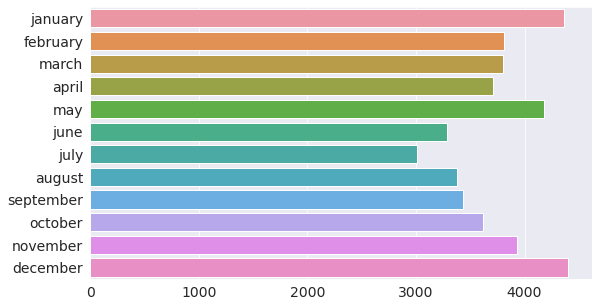

In [117]:
sns.barplot(data=goa_df,orient='h');

In [118]:
goa_df=weather_df.groupby('state/ ut').sum().reset_index()

In [119]:
goa_df=goa_df.loc[goa_df['state/ ut']=='Goa']

In [122]:
print(goa_df.clear_total)

10    3556.0
Name: clear_total, dtype: float64


Q3:Each year, how many road accidents occur in India and how does it compare to other parts of the world?

In [130]:
world_df=world_df.groupby('Country').mean().reset_index()

In [ ]:
world_df.drop('Year',axis=1,inplace=True)

In [132]:
world_df

,Country,Deaths
0,Afghanistan,6944.400000
1,Africa,211973.933333
2,African Region,161317.633333
3,African Union,211973.933333
4,Albania,284.066667
...,...,...
262,World Bank Lower Middle Income,419987.566667
263,World Bank Upper Middle Income,534710.900000
264,Yemen,9277.566667
265,Zambia,1899.166667


In [127]:
mean_death=world_df.Deaths.mean()
mean_death

44516.61423220974

In [134]:
world_df[world_df.Country=='India'].Deaths

114    178205.133333
Name: Deaths, dtype: float64

India has 178205 accidents every year, meanwhile there are 44516 accidents happening in every other country on average. Approximately, India has about 400% more number of accidents happening when compared to the other countries. This is due to the high population and high rate of motorization.

Q4: Out of 100 accidents, How many deaths occur in India?

In [135]:
injured_labels=[i for i in weather_df.columns if 'injured' in i]
death_labels=[j for j in weather_df.columns if 'death' in j]


In [136]:
injured_df=weather_df[injured_labels]
death_df=weather_df[death_labels]

In [137]:
data2=[death_df.heavy_rain_death.sum(),injured_df.heavy_rain_injured.sum()]

In [138]:
label2=['Deaths','Injuries']

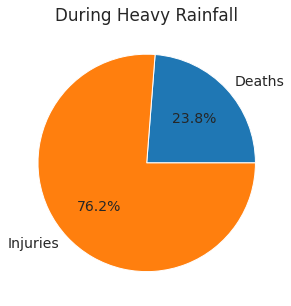

In [139]:
plt.pie(data2,labels=label2,autopct='%0.1f%%');
plt.title('During Heavy Rainfall');

So, Out of 100 accidents there are approximately 24 deaths in India.

## Inferences and Conclusion

Although this report gives a general analysis about number of accidents, it could be improved by including data containing road conditions, accidents caused due to rules violation, etc..

## References and Future work

As time goes on, the data has to be kept updated for the best analysis. Lets hope new data with more information will be available in the future to work with.

- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets